**Project 1 from Data Science Nanodegree at Udacity**

This project aims to observe the coder (someone who codes) evolution profile through the years considering their formal degree. 
It was used the Stack Overflow Surveys datasets from 2017 to 2020 (https://insights.stackoverflow.com/survey) to obtain the answer to the following questions:

    1. How important is a formal education, such as a university degree in computer science, to your career?
	2. Is there any bias in the above opinion depending on their major undergrad?
	3. What is the proportion between these two type of professionals along the years?
	4. Depending on your degree, there is difference in salary or compensation if you work coding? How does it is indicated along the time?


In [279]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
#Gather
data20 = pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2020 survey_results_public.csv')
schema20 = pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2020 survey_results_schema.csv')
data19 = pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2019 survey_results_public.csv')
schema19 = pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2019 survey_results_schema.csv')
data18 = pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2018 survey_results_public.csv', low_memory = False)
schema18 =pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2018 survey_results_schema.csv')
data17 = pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2017 survey_results_public.csv')
schema17 = pd.read_csv('/home/natalia/Documents/coder-evolution/data/data/csv/2017 survey_results_schema.csv')


In [3]:
#Searching for the necessary columns to answer my questions
pd.set_option('display.max_columns', None)
pd.set_option('max_rows',100)
pd.options.display.max_colwidth = 500 #increasing the number of characters to be read in a row



In [5]:
# Is it necessary to have a formal degree to get a developer job (like computer science university degree)
schema20.iloc[29,1]

'How important is a formal education, such as a university degree in computer science, to your career?'

In [6]:
# Is it necessary to have a formal degree to get a developer job (like computer science university degree)
#How many of them work like a devoloper or code sometimes AND think it is important to have a formal degree such computer science degree?
#And among them, how many did undergraduate in computer science?

formal_degree = data20[['MainBranch','UndergradMajor','Employment','NEWEdImpt']].dropna(subset=['MainBranch','Employment','NEWEdImpt'])
#'I am a developer by profession'
#'I used to be a developer by profession, but no longer am'
#'I am not primarily a developer, but I write code sometimes as part of my work'
formal_degree.shape


(48140, 4)

In [7]:
data20['Employment'].unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

In [8]:
#Dropping rows in wich the value of column 'MainBranch' is "hobby" 
formal_degree_and_professional = formal_degree[(formal_degree.MainBranch != 'I am a student who is learning to code') &
                     (formal_degree.MainBranch != 'I code primarily as a hobby')]
#Dropping rows in wich the value of column 'Employment' is "Not emploeyd" and 'Student'
formal_degree_and_professional = formal_degree[(formal_degree.Employment != 'Student') &
                     (formal_degree.Employment != 'Not employed, and not looking for work') & (formal_degree.Employment != 'Not employed, but looking for work')]
formal_degree_and_professional.shape


(46710, 4)

In [9]:
#professional or someone who codes X number of each category of importance
y = formal_degree_and_professional['NEWEdImpt'].value_counts()/formal_degree.shape[0]*100



In [10]:
formal_degree

,MainBranch,UndergradMajor,Employment,NEWEdImpt
0,I am a developer by profession,"Computer science, computer engineering, or software engineering","Independent contractor, freelancer, or self-employed",Fairly important
1,I am a developer by profession,"Computer science, computer engineering, or software engineering",Employed full-time,Fairly important
4,"I used to be a developer by profession, but no longer am","Computer science, computer engineering, or software engineering",Employed full-time,Very important
5,I am a developer by profession,NaN,Employed full-time,Fairly important
6,I am a developer by profession,"Computer science, computer engineering, or software engineering",Employed full-time,Very important
...,...,...,...,...
64152,I am a developer by profession,"Computer science, computer engineering, or software engineering",Employed full-time,Not at all important/not necessary
64153,I am a developer by profession,"Information systems, information technology, or system administration",Employed full-time,Very important
64154,I am a developer by profession,Web development or web design,Employed full-time,Fairly important
64156,"I used to be a developer by profession, but no longer am",I never declared a major,Employed full-time,Very important


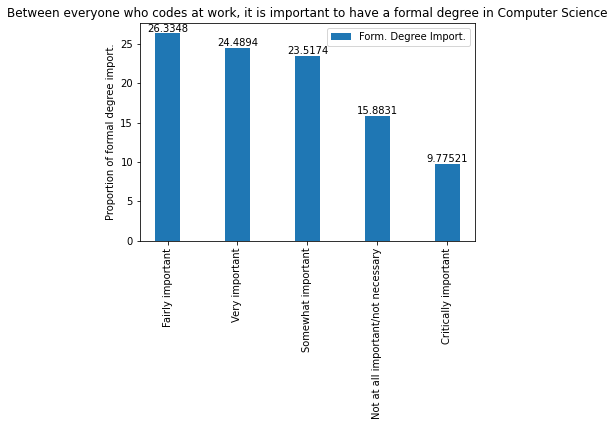

In [11]:
#professional or someone who codes X number of each category of importance

y = formal_degree_and_professional['NEWEdImpt'].value_counts()/formal_degree_and_professional.shape[0]*100
values_y = y.values.tolist()
index_y = y.index.tolist()
x = np.arange(len(index_y)) #the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x, values_y, width, label='Form. Degree Import.')
ax.set_ylabel('Proportion of formal degree import.')
ax.set_title('Between everyone who codes at work, it is important to have a formal degree in Computer Science')
ax.set_xticks(x)
ax.set_xticklabels(index_y, rotation=90)
ax.legend()
ax.bar_label(rects1, padding=0)

plt.show()

In [12]:
#Dropping rows in wich the value of column 'UndergradMajor' is different of Computer Science
formal_degree_and_compSci = formal_degree[(formal_degree.UndergradMajor == "Computer science, computer engineering, or software engineering")]

In [13]:
formal_degree_and_compSci.shape 


(27497, 4)

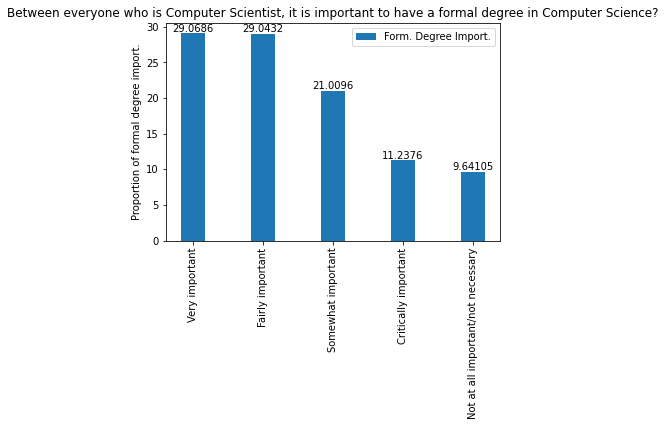

In [14]:
#professional and Computer Scientist X number of each category of importance

y1 = formal_degree_and_compSci['NEWEdImpt'].value_counts()/formal_degree_and_compSci.shape[0]*100
values_y1 = y1.values.tolist()
index_y1 = y1.index.tolist()
x1 = np.arange(len(index_y1)) #the label locations
width1 = 0.35  # the width of the bars
fig1, ax1 = plt.subplots()
rects2 = ax1.bar(x1, values_y1, width1, label='Form. Degree Import.')
ax1.set_ylabel('Proportion of formal degree import.')
ax1.set_title('Between everyone who is Computer Scientist, it is important to have a formal degree in Computer Science?')
ax1.set_xticks(x1)
ax1.set_xticklabels(index_y1, rotation=90)
ax1.legend()
ax1.bar_label(rects2, padding=0)

plt.show()

In [15]:
#Dropping rows in wich the value of column 'UndergradMajor' is Computer Science including NaN
formal_degree_and_not_compSci = formal_degree[(formal_degree.UndergradMajor != "Computer science, computer engineering, or software engineering")]
formal_degree_and_not_compSci.shape 

(20643, 4)

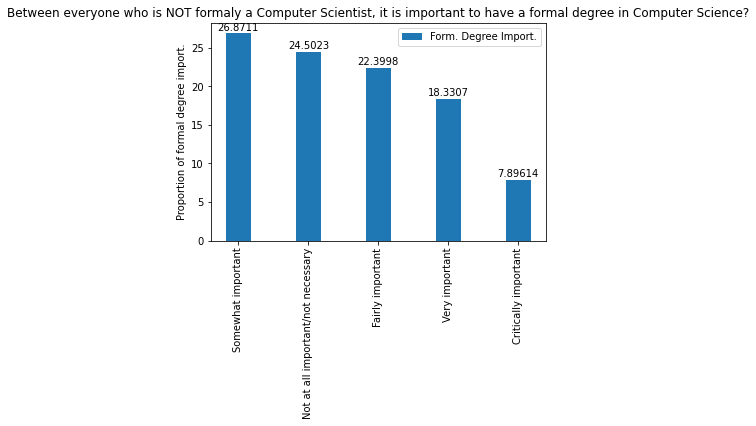

In [16]:
#professional and not a Computer Scientist X number of each category of importance

y2 = formal_degree_and_not_compSci['NEWEdImpt'].value_counts()/formal_degree_and_not_compSci.shape[0]*100
values_y2 = y2.values.tolist()
index_y2 = y2.index.tolist()
x2 = np.arange(len(index_y2)) #the label locations
width2 = 0.35  # the width of the bars
fig2, ax2 = plt.subplots()
rects3 = ax2.bar(x2, values_y2, width2, label='Form. Degree Import.')
ax2.set_ylabel('Proportion of formal degree import.')
ax2.set_title('Between everyone who is NOT formaly a Computer Scientist, it is important to have a formal degree in Computer Science?')
ax2.set_xticks(x2)
ax2.set_xticklabels(index_y2, rotation=90)
ax2.legend()
ax2.bar_label(rects3, padding=1)

plt.show()

<b>How is this happening along the time (number of non-formal degrees in computation employees/time)? <b>



In [17]:
#Getting the number of non computer science professionals who works/worked with code
dev_not_compSci_20 = formal_degree[(formal_degree.UndergradMajor != 'Computer science, computer engineering, or software engineering') & 
                                     (formal_degree.UndergradMajor != 'Web development or web design') & 
                                  (formal_degree.UndergradMajor != 'Information systems, information technology, or system administration')]

not_dev_degree_professionals20 = dev_not_compSci_20.shape[0]
ratio20 = not_dev_degree_professionals20/formal_degree.shape[0]*100


In [18]:
#Getting statistics of dev or coder professionals profile from 2019 dataset 
professionals19 = data19[['MainBranch','UndergradMajor', 'Employment']].dropna(subset = ['MainBranch','Employment'])
#Filtering the rows from whose values are different from coder people employed or retired
filt_professionals19 = professionals19[(professionals19.MainBranch != 'I am a student who is learning to code') &
                     (professionals19.MainBranch != 'I code primarily as a hobby')]
filt_professionals19 = filt_professionals19[(filt_professionals19.Employment != 'Not employed, and not looking for work') 
                                           & (filt_professionals19.Employment != 'Not employed, and looking for work')
                                           & (filt_professionals19.Employment != 'Student')]
#Filtering from people who have a computer science degree or some other related field
dev_not_compSci_19 = filt_professionals19[(filt_professionals19.UndergradMajor != 'Computer science, computer engineering, or software engineering') & 
                                     (filt_professionals19.UndergradMajor != 'Web development or web design') & 
                                  (filt_professionals19.UndergradMajor != 'Information systems, information technology, or system administration')]
#Ratio between the number of non computer scientists who works coding and the total
ratio19 = dev_not_compSci_19.shape[0]/filt_professionals19.shape[0]*100




In [19]:
#Getting statistics of dev or coder professionals profile from 2018 dataset 
#Goal: get the number of professionals who codes and is no from computer sci X total employed or retired
professionals18 = data18[['UndergradMajor', 'Employment','DevType']].dropna(subset = ['Employment','DevType'])

#Filtering who is not employed
professionals18 = professionals18[(professionals18.Employment != 'Not employed, and not looking for work')
                                 & (professionals18.Employment != 'Not employed, but looking for work') ]


In [20]:
#Filtering who does not work in the market coding
professionals18 = professionals18[('C-suite executive (CEO, CTO, etc.)' != professionals18.DevType) & 
('Student' != professionals18.DevType)& 
('Designer' != professionals18.DevType)&
('Marketing or sales professional' != professionals18.DevType)&
('Educator or academic researcher'!= professionals18.DevType)]

In [ ]:
#Checking which not dev professions are contained in DevType in 2018 dataset
np.set_printoptions(threshold=np.inf)
not_dev_professions = []
for profession in professionals18['DevType'].unique():
    if 'developer' not in profession:
        if profession not in not_dev_professions:
            print(profession, '/')
            not_dev_professions.append(profession)
        
            
            
    

In [22]:
#Getting the number of people who works in the market coding somehow without a formal degree in computation 
ratio_non_compSci18 = professionals18[(professionals18.UndergradMajor != 'Computer science, computer engineering, or software engineering')
                & (professionals18.UndergradMajor != 'Information systems, information technology, or system administration')
                & (professionals18.UndergradMajor != 'Web development or web design')]

In [23]:
#2018 ratio between professionals who had notDepending on your degree, there is difference in salary or compensation if you work coding? How does it is indicated along the time? a computation degree and general
ratio18 = ratio_non_compSci18.shape[0]/professionals18.shape[0]*100

In [24]:
professionals17 = data17[['Professional', 'EmploymentStatus', 'MajorUndergrad']].dropna(subset=['Professional','EmploymentStatus'])
professionals17 = professionals17[(professionals17.Professional != 'Student')
                                 & (professionals17.Professional != 'None of these')]

In [25]:
professionals17['EmploymentStatus'].unique()
professionals17 = professionals17[(professionals17.EmploymentStatus != 'Not employed, but looking for work')
                                 & (professionals17.EmploymentStatus != 'Not employed, and not looking for work')
                                 & (professionals17.EmploymentStatus != 'I prefer not to say')]

In [26]:
#Getting the number of people who works in the market coding somehow without a formal degree in computation 
ratio_non_compSci17 = professionals17[(professionals17.MajorUndergrad != 'Computer science or software engineering')
                & (professionals17.MajorUndergrad != 'Computer engineering or electrical/electronics engineering')
                & (professionals17.MajorUndergrad != 'Computer programming or Web development')
                & (professionals17.MajorUndergrad != 'Information technology, networking, or system administration')]                   

In [27]:
ratio17 = ratio_non_compSci17.shape[0]/professionals17.shape[0]*100

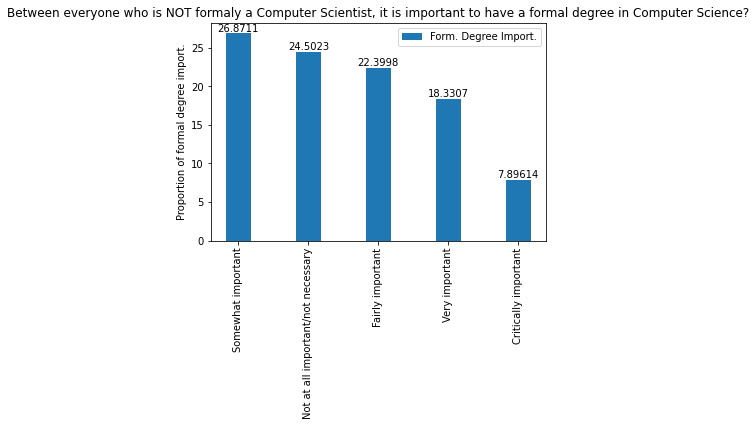

In [85]:
#Graphic of this rate along the time:
y2 = formal_degree_and_not_compSci['NEWEdImpt'].value_counts()/formal_degree_and_not_compSci.shape[0]*100
values_y2 = y2.values.tolist()
index_y2 = y2.index.tolist()
x2 = np.arange(len(index_y2)) #the label locations
width2 = 0.35  # the width of the bars
fig2, ax2 = plt.subplots()
rects3 = ax2.bar(x2, values_y2, width2, label='Form. Degree Import.')
ax2.set_ylabel('Proportion of formal degree import.')
ax2.set_title('Between everyone who is NOT formaly a Computer Scientist, it is important to have a formal degree in Computer Science?')
ax2.set_xticks(x2)
ax2.set_xticklabels(index_y2, rotation=90)
ax2.legend()
ax2.bar_label(rects3, padding=0)

plt.show()

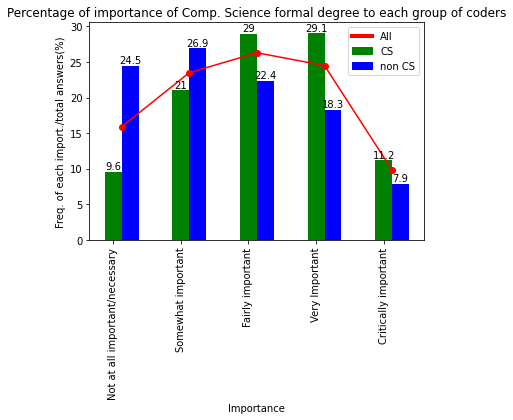

In [283]:
#Plotting the three charts in one 
data_index = ['Not at all important/necessary', 'Somewhat important', 'Fairly important','Very Important', 'Critically important']
general = [15.9,23.5,26.3,24.5,9.8]
CS = [9.6,21.0,29.0,29.1,11.2]
non_CS = [24.5,26.9,22.4,18.3,7.9]

data = [general,CS, non_CS]
X = np.arange(5)
line1, = plt.plot(X+0.375, data[0],color='red', marker='o', label = 'All coders')
bar2 = plt.bar(X + 0.25, data[1], width = 0.25, color = 'g')
bar3 = plt.bar(X + 0.50, data[2], width = 0.25, color = 'b')
plt.xticks(X+0.25,data_index,rotation=90)

plt.xlabel("Importance")
plt.ylabel('Freq. of each import./total answers(%)')
plt.title("Percentage of importance of Comp. Science formal degree to each group of coders")
plt.bar_label(bar2,padding=0)
plt.bar_label(bar3,padding=0)

legend_elements = [Line2D([0], [0], color='r', lw=4, label='All'),
                   Patch(facecolor='g', edgecolor='g',
                         label='CS'),
                   Patch(facecolor='b', edgecolor='b',
                         label='non CS')]

plt.legend(handles=legend_elements)
plt.show()


[Text(0, 0, '32.0626'),
 Text(0, 0, '32.8012'),
 Text(0, 0, '32.0942'),
 Text(0, 0, '32.445')]

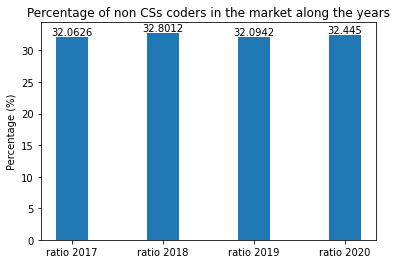

In [244]:
x_years = np.arange(4) #the label locations
years_values_y = [ratio17, ratio18, ratio19, ratio20]
x_labels = ['ratio 2017', 'ratio 2018', 'ratio 2019', 'ratio 2020']
bar_width = 0.35
fig3, ax3 = plt.subplots()
rects4 = ax3.bar(x_years, years_values_y, bar_width)
ax3.set_ylabel('Percentage (%)')
ax3.set_xticks(x_years)
ax3.set_xticklabels(x_labels)
ax3.set_title("Percentage of non CSs in the market along the years.")
ax3.bar_label(rects4, padding = 0)


67.55

<b>Is there difference between the salary of people who have a formal degree in Comp Sci and who haven't? Let's see the percentage difference along the years 2020 and 2017:<b>


In [30]:
#2020
not_computerSci20 = data20[(data20.UndergradMajor != 'Computer science, computer engineering, or software engineering') & 
                  (data20.UndergradMajor != 'Web development or web design') & 
                  (data20.UndergradMajor != 'Information systems, information technology, or system administration') & 
                  (data20.MainBranch != 'I am a student who is learning to code') &
                  (data20.MainBranch != 'I code primarily as a hobby') &
                  (data20.Employment != 'Not employed, and not looking for work') &
                  (data20.Employment != 'Not employed, and looking for work') &
                  (data20.Employment != 'Student')]
not_computerSci20 = not_computerSci20[['UndergradMajor', 'MainBranch','Country', 'Employment','CompFreq','CompTotal','ConvertedComp','CurrencyDesc']]


In [31]:
compensation20 = not_computerSci20[not_computerSci20.ConvertedComp != 0].dropna(subset=['ConvertedComp']) #11203 people answered
not_computerSci20.shape #19897 people answered totally without dropna
not_computerSci20.iloc[1,5]
not_computerSci20['CompTotal'].isna().sum() #8694 nan em CompTotal
not_computerSci20['ConvertedComp'].isna().sum() #8723 nan em ConvertedComp
compensation20.shape[0]

11115

In [32]:
#THE PEOPLE WHO HAVE NOT A FORMAL SCI COMP EDUCATION WORLDWIDE EARN U$111,249U ANNUALY 
compensation20_sorted = compensation20.sort_values(['ConvertedComp'],ascending=False)
not_compSci_compens_mean20 = compensation20_sorted['ConvertedComp'].mean() 

In [33]:
computerSci20 = data20[(data20.UndergradMajor == 'Computer science, computer engineering, or software engineering') |
                  (data20.UndergradMajor == 'Web development or web design') |
                  (data20.UndergradMajor == 'Information systems, information technology, or system administration') & 
                  (data20.MainBranch != 'I am a student who is learning to code') &
                  (data20.MainBranch != 'I code primarily as a hobby') &
                  (data20.Employment != 'Not employed, and not looking for work') &
                  (data20.Employment != 'Not employed, and looking for work') &
                  (data20.Employment != 'Student')]
compSci_compens20 = computerSci20[['UndergradMajor', 'MainBranch','Country', 'Employment','CompFreq','CompTotal','ConvertedComp','CurrencyDesc']]


In [34]:
compSci_compens20 = compSci_compens20[compSci_compens20.ConvertedComp != 0].dropna(subset=['ConvertedComp']) 
compSci_compens20.shape # #23499 people answered totally without dropna and without 0
computerSci20['CompTotal'].dropna().shape #23623 (124 didin't converted to U$dollar annualy)


(23623,)

In [35]:
#THE PEOPLE WHO HAVE A FORMAL SCI COMP EDUCATION (or similar) WORLDWIDE EARN U$100,838.40 ANNUALY IN AVERAGE
compSci_compens20_sorted = compSci_compens20.sort_values(['ConvertedComp'],ascending=False)
compSci_compens_mean20 = compSci_compens20['ConvertedComp'].mean()
compSci_compens_mean20

100838.40286820715

In [36]:
#DIFFERENCE PERCENTAGE 2020 BETWEEN COMPUTER SCIENTISTS AND WHO'S NOT = 10,32%
dif_perc20 = (not_compSci_compens_mean20-compSci_compens_mean20)/compSci_compens_mean20*100
dif_perc20


10.32502284724738

In [37]:
#2019
computerSci19 = data19[(data19.UndergradMajor == 'Computer science, computer engineering, or software engineering') |
                  (data19.UndergradMajor == 'Web development or web design') |
                  (data19.UndergradMajor == 'Information systems, information technology, or system administration') & 
                  (data19.MainBranch != 'I am a student who is learning to code') &
                  (data19.MainBranch != 'I code primarily as a hobby') &
                  (data19.Employment != 'Not employed, and not looking for work') &
                  (data19.Employment != 'Not employed, and looking for work') &
                  (data19.Employment != 'Student')]
compSci_compens19 = computerSci19[['UndergradMajor', 'MainBranch','Country', 'Employment','CompFreq','CompTotal','ConvertedComp','CurrencyDesc']]
compSci_compens19 = compSci_compens19[compSci_compens19.ConvertedComp != 0].dropna(subset=['ConvertedComp']) 
compSci_compens19.shape #37715 people answered totally without dropna and without 0
computerSci19['CompTotal'].dropna().shape #37935 (220 didin't converted to U$ dollar annualy)

#THE PEOPLE WHO HAVE A FORMAL SCI COMP EDUCATION (or similar) WORLDWIDE EARN U$124,224.99 ANNUALY IN AVERAGE
compSci_compens19_sorted = compSci_compens19.sort_values(['ConvertedComp'],ascending=False)
compSci_compens_mean19 = compSci_compens19['ConvertedComp'].mean()

In [38]:
not_computerSci19 = data19[(data19.UndergradMajor != 'Computer science, computer engineering, or software engineering') &
                  (data19.UndergradMajor != 'Web development or web design') &
                  (data19.UndergradMajor != 'Information systems, information technology, or system administration') & 
                  (data19.MainBranch != 'I am a student who is learning to code') &
                  (data19.MainBranch != 'I code primarily as a hobby') &
                  (data19.Employment != 'Not employed, and not looking for work') &
                  (data19.Employment != 'Not employed, and looking for work') &
                  (data19.Employment != 'Student')]
not_computerSci19 = not_computerSci19[['UndergradMajor', 'MainBranch','Country', 'Employment','CompFreq','CompTotal','ConvertedComp','CurrencyDesc']]
compensation19 = not_computerSci19[not_computerSci19.ConvertedComp != 0].dropna(subset=['ConvertedComp']) #17,909 people answered
not_computerSci19.shape #24318 people answered totally without dropna, counting with Nan and 0's
not_computerSci19['CompTotal'].isna().sum() #6308 nan em CompTotal
not_computerSci19['ConvertedComp'].isna().sum() #6341 nan em ConvertedComp

#THE PEOPLE WHO HAVE NOT A FORMAL SCI COMP EDUCATION WORLDWIDE EARN U$134,600.33 ANNUALY 
compensation19_sorted = compensation19.sort_values(['ConvertedComp'],ascending=False)
not_compSci_compens_mean19 = compensation19_sorted['ConvertedComp'].mean()

In [39]:
#DIFFERENCE PERCENTAGE 2019 BETWEEN COMPUTER SCIENTISTS AND WHO'S NOT = 8,32%
dif_perc19 = (not_compSci_compens_mean19-compSci_compens_mean19)/compSci_compens_mean19*100
dif_perc19

8.352059995452716

In [40]:
#2018
not_compSci_salary18 = data18.iloc[ratio_non_compSci18.index.values]
not_compSci_compens18 = not_compSci_salary18[['UndergradMajor', 'Employment','DevType','ConvertedSalary']]
not_compSci_compens18 = not_compSci_compens18.sort_values(['ConvertedSalary'],ascending=False)

In [41]:
not_compSci_compens18 = not_compSci_compens18[not_compSci_compens18.ConvertedSalary != 0].dropna(subset=['ConvertedSalary']) 
not_compSci_salary18.shape #26,117 people answered totally without dropna, counting with Nan and 0's
not_compSci_compens18.shape # 14,909 answered with real values their converted annualy salaries

#THE PEOPLE WHO DON'T HAVE A FORMAL SCI COMP EDUCATION (or similar) WORLDWIDE EARN U$103,226.44 ANNUALY IN AVERAGE IN 2018
not_compSci_salary_mean18 = not_compSci_compens18['ConvertedSalary'].mean()
not_compSci_salary_mean18

103226.43537460595

In [42]:
compSci18 = professionals18[(professionals18.UndergradMajor == 'Computer science, computer engineering, or software engineering')
                | (professionals18.UndergradMajor == 'Information systems, information technology, or system administration')
                | (professionals18.UndergradMajor == 'Web development or web design')]

In [43]:
compSci_salary18 = data18.iloc[compSci18.index.values]
compSci_compens18 = compSci_salary18[['UndergradMajor','Employment','DevType','ConvertedSalary']]
compSci_compens18 = compSci_compens18.sort_values(['ConvertedSalary'],ascending=False)

In [44]:
compSci_compens18 = compSci_compens18[compSci_compens18.ConvertedSalary != 0].dropna(subset=['ConvertedSalary'])
compSci_salary18.shape # 53,505 people answered totally without dropna, counting with Nan and 0's
compSci_compens18.shape # 29,867 answered with real values their converted annualy salaries

#THE PEOPLE WHO HAVE A FORMAL SCI COMP EDUCATION (or similar) WORLDWIDE EARN U$96,238,03 ANNUALY IN AVERAGE
compSci_salary_mean18 = compSci_compens18['ConvertedSalary'].mean()
compSci_salary_mean18

96238.02996618341

In [45]:
#DIFFERENCE PERCENTAGE 2018 BETWEEN COMPUTER SCIENTISTS AND WHO'S NOT = 7.26%
dif_perc18 = (not_compSci_salary_mean18-compSci_salary_mean18)/compSci_salary_mean18*100
dif_perc18

7.261584023361819

In [46]:
#2017
not_compSci_salary17 = data17.iloc[ratio_non_compSci17.index.values]
not_compSci_salary_filtered_17 = not_compSci_salary17[['MajorUndergrad','EmploymentStatus','Salary','Currency']].dropna(subset=['Salary','Currency'])
not_compSci_salary_filtered_17 = not_compSci_salary_filtered_17[(not_compSci_salary_filtered_17.Currency == 'U.S. dollars ($)')
                                             & (not_compSci_salary_filtered_17.Salary != 0)]
                                              

In [47]:
not_compSci_salary17.shape #13,129 people answered totally without dropna, counting with Nan and 0's
not_compSci_salary_filtered_17.shape # 1,439 answered with real values their converted annualy salaries and HAD US DOLLAR CURRENCY


(1439, 4)

In [48]:
#THE PEOPLE WHO DON'T HAVE A FORMAL SCI COMP EDUCATION (or similar) WORLDWIDE EARN U$90,597.18 ANNUALY IN AVERAGE IN 2017
not_compSci_salary_mean17 = not_compSci_salary_filtered_17['Salary'].mean()
not_compSci_salary_mean17

90597.17904454713

In [49]:
compSci_salary17 = professionals17[(professionals17.MajorUndergrad == 'Computer science or software engineering')
                | (professionals17.MajorUndergrad == 'Computer engineering or electrical/electronics engineering')
                | (professionals17.MajorUndergrad == 'Computer programming or Web development')
                | (professionals17.MajorUndergrad == 'Information technology, networking, or system administration')]  

In [50]:
compSci_salary17 = data17.iloc[compSci_salary17.index.values]
compSci_salary_filtered_17 = compSci_salary17[['MajorUndergrad','EmploymentStatus','Salary','Currency']].dropna(subset=['Salary','Currency'])
compSci_salary_filtered_17 = compSci_salary_filtered_17[(compSci_salary_filtered_17.Currency == 'U.S. dollars ($)')
                                             & (compSci_salary_filtered_17.Salary != 0)]

In [51]:
compSci_salary17.shape #27,819 people answered totally without dropna, counting with Nan and 0's
compSci_salary_filtered_17.shape # 2,849 answered with real values their converted annualy salaries and HAD US DOLLAR CURRENCY


(2849, 4)

In [52]:
#THE PEOPLE WHO DON'T HAVE A FORMAL SCI COMP EDUCATION (or similar) WORLDWIDE EARN U$87,346.46 ANNUALY IN AVERAGE IN 2017
compSci_salary_mean17 = compSci_salary_filtered_17['Salary'].mean()
compSci_salary_mean17

87346.47654340298

In [53]:
#DIFFERENCE PERCENTAGE 2018 BETWEEN COMPUTER SCIENTISTS AND WHO'S NOT = 3,72%
dif_perc17 = (not_compSci_salary_mean17-compSci_salary_mean17)/compSci_salary_mean17*100
dif_perc17

3.7216183523199704

[Text(0, 0, '3.72162'),
 Text(0, 0, '7.26158'),
 Text(0, 0, '8.35206'),
 Text(0, 0, '10.325')]

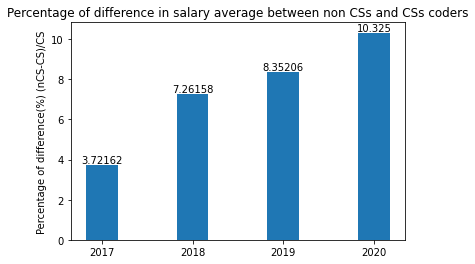

In [240]:
#Plotting the differences of salary or compencies along the years
x_years  #the label locations
diff_perc_y = [dif_perc17, dif_perc18, dif_perc19, dif_perc20]
x_labels_diff = [ '2017', '2018', '2019', '2020']
bar_width 
fig4, ax4 = plt.subplots()
rects5 = ax4.bar(x_years, diff_perc_y, bar_width)
ax4.set_ylabel('Percentage of difference(%) (nCS-CS)/CS')
ax4.set_xticks(x_years)
ax4.set_xticklabels(x_labels_diff)
ax4.set_title("Percentage of difference in salary average between non CSs and CSs coders")
ax4.bar_label(rects5, padding = 0)


In [192]:
data20_edLevel = data20.iloc[not_computerSci20.index.values]
data20_edLevel = data20_edLevel[['UndergradMajor','DevType', 'EdLevel', 'ConvertedComp']].dropna(subset=['ConvertedComp'])
data20_edLevel['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          4159
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       2805
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    1466
Some college/university study without earning a degree                                1202
Other doctoral degree (Ph.D., Ed.D., etc.)                                             722
Associate degree (A.A., A.S., etc.)                                                    230
I never completed any formal education                                                 154
Primary/elementary school                                                              153
Professional degree (JD, MD, etc.)                                                     142
Name: EdLevel, dtype: int64

In [194]:
data20_edLevel['UndergradMajor'].value_counts()

Another engineering discipline (such as civil, electrical, mechanical, etc.)      2931
A natural science (such as biology, chemistry, physics, etc.)                     1485
Mathematics or statistics                                                         1199
A business discipline (such as accounting, finance, marketing, etc.)               825
A humanities discipline (such as literature, history, philosophy, etc.)            719
A social science (such as anthropology, psychology, political science, etc.)       620
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     508
I never declared a major                                                           232
A health science (such as nursing, pharmacy, radiology, etc.)                      127
Name: UndergradMajor, dtype: int64

In [152]:
def compensation_mean(data_serie_filter, data, value):
    '''
    Function to calculate the average compensation that each group of people from some Undergrad or other study level earns
    Input:
     data_serie_filter = a pandas Series ex: data.column_name
     data = pandas dataframe name
     value = string containing the value, Undergraduate or Education leve, you want to know the compensation mean
    Returns:
     num_people = int with the number of people
     compensation_mean = float with the compensation mean for each group
    '''
    value_dataframe = data[data_serie_filter == value]
    num_people = value_dataframe.shape[0]
    compensation_mean = value_dataframe['ConvertedComp'].mean()
    return num_people, compensation_mean

math_e_stats_shape20, math_e_stats20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'Mathematics or statistics')
#1199 people who did math and stats and work coding
#U$130,102.59 annualy

eng_shape20, engineering20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'Another engineering discipline (such as civil, electrical, mechanical, etc.)')
#2931 work coding 
#U$92776.57 annualy

nat_sci_shape20, nat_sci_comp_mean20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'A natural science (such as biology, chemistry, physics, etc.)')
#1485 work coding 
#U$113,949.78 

arts_shape20, arts_comp_mean20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'Fine arts or performing arts (such as graphic design, music, studio art, etc.)')
#508 work coding
#U$159630.37

no_major_shape20, no_major_comp_mean20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel, 'I never declared a major')
#232
#U$134,906.59

human_shape20, human_comp_mean20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'A humanities discipline (such as literature, history, philosophy, etc.)')
#719
#145240.65

health_shape20, health_comp_mean20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'A health science (such as nursing, pharmacy, radiology, etc.)')
#127
#U$70,738.69

social_shape20, social_comp_mean20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'A social science (such as anthropology, psychology, political science, etc.)')
#620
#U$130,689.14

business_shape20, business_comp_mean20 = compensation_mean(data20_edLevel.UndergradMajor,data20_edLevel,'A business discipline (such as accounting, finance, marketing, etc.)')
#825
#U$109,906.89

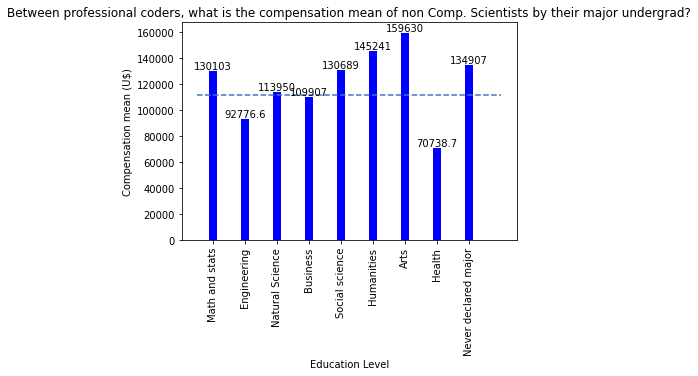

In [238]:
#Plotting the edLevel salary charts in one 
data_index = ['Math and stats','Engineering', 'Natural Science', 'Business','Social science', 'Humanities', 'Arts', 'Health', 'Never declared major']


data = [math_e_stats_comp_mean, engineering20,nat_sci_comp_mean20,business_comp_mean20,social_comp_mean20,human_comp_mean20,arts_comp_mean20, health_comp_mean20, no_major_comp_mean20]
X = np.arange(len(data))
bar1 = plt.bar(X, data, width = 0.25, color = 'b')
plt.xticks(X,data_index,rotation=90)

plt.xlabel("Education Level")
plt.ylabel('Compensation mean (U$)')
plt.title("Between professional coders, what is the compensation mean of non Comp. Scientists by their major undergrad?")
plt.bar_label(bar1,padding=0)
plt.hlines(not_compSci_compens_mean20,-0.5,9,linestyles='--',colors='#4472C4',label='average')


plt.show()

In [198]:
#Getting the compensation per each education level from data 2020 
bach_shape20, bach_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Bachelor’s degree (B.A., B.S., B.Eng., etc.)')
master_shape20, master_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)')
secondary_shape20, secondary_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)')
nondegree_shape20, nondegree_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Some college/university study without earning a degree')
doc_shape20, doc_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Other doctoral degree (Ph.D., Ed.D., etc.)')
assoc_shape20, assoc_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Associate degree (A.A., A.S., etc.)')
primary_shape20, primary_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Primary/elementary school')
nonformal_shape20, nonformal_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'I never completed any formal education')
profess_shape20, profess_mean20 = compensation_mean(data20_edLevel.EdLevel,data20_edLevel,'Professional degree (JD, MD, etc.)')


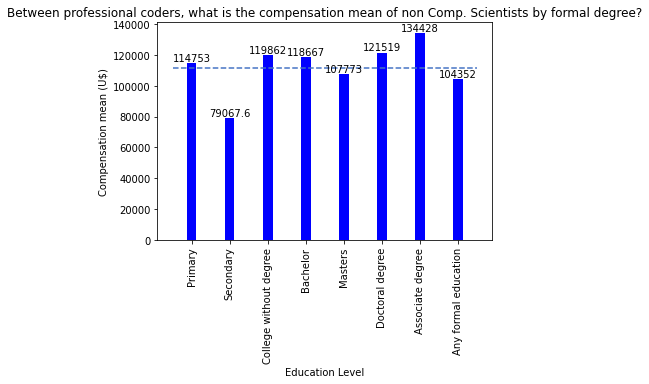

In [239]:
#Plotting the edLevel salary charts in one 
data_index = ['Primary','Secondary', 'College without degree', 'Bachelor','Masters', 'Doctoral degree', 'Associate degree', 'Any formal education']


data = [primary_mean20,secondary_mean20,nondegree_mean20,bach_mean20,master_mean20,doc_mean20,assoc_mean20, nonformal_mean20]
X = np.arange(len(data))
bar1 = plt.bar(X, data, width = 0.25, color = 'b')
plt.xticks(X,data_index,rotation=90)

plt.xlabel("Education Level")
plt.ylabel('Compensation mean (U$)')
plt.title("Between professional coders, what is the compensation mean of non Comp. Scientists by formal degree?")
plt.bar_label(bar1,padding=0)
plt.hlines(not_compSci_compens_mean20,-0.5,7.5,linestyles='--',colors='#4472C4',label='average')


plt.show()

In [195]:
data20_edLevel['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          4159
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       2805
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    1466
Some college/university study without earning a degree                                1202
Other doctoral degree (Ph.D., Ed.D., etc.)                                             722
Associate degree (A.A., A.S., etc.)                                                    230
I never completed any formal education                                                 154
Primary/elementary school                                                              153
Professional degree (JD, MD, etc.)                                                     142
Name: EdLevel, dtype: int64